In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv('admitance.csv')

In [3]:
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
data = raw_data.copy()

In [5]:
data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [6]:
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})

In [7]:
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [8]:
y = data['Admitted'] #dep

In [9]:
y

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64

In [10]:
x1 = data['SAT']  #independent

In [11]:
x1

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

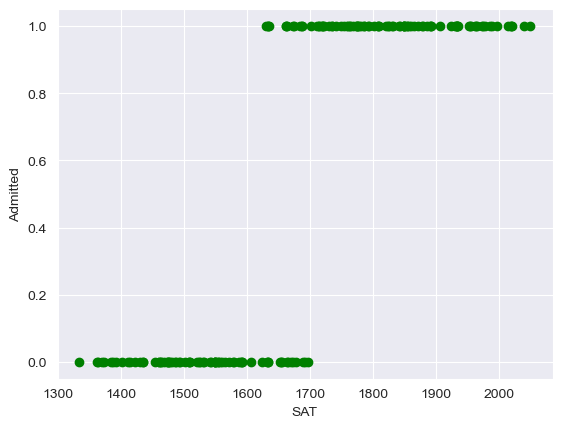

In [12]:
plt.scatter(x1,y,color='green')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [13]:
x = sm.add_constant(x1)

In [14]:
x

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
...,...,...
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524


In [15]:
reg_lin =sm.OLS(y,x)

In [16]:
result_lin = reg_lin.fit()

In [18]:
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           2.98e-43
Time:                        13:02:05   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
result_lin.params

const   -3.251859
SAT      0.002248
dtype: float64

In [20]:
result_lin.params[1]

0.002248239977968566

In [22]:
result_lin.params[0]

-3.2518585426506874

# Yhat = b1 * x1 + b0

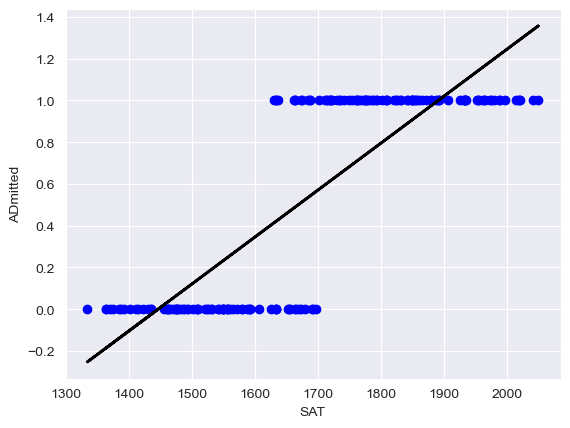

In [23]:
plt.scatter(x1,y,color = 'blue')
yhat = x1*result_lin.params[1] + result_lin.params[0]  #x1*0.0022 +*(-3.2521)
plt.plot(x1,yhat,lw=2,color='black')
plt.xlabel('SAT')
plt.ylabel('ADmitted')
plt.show()

# Logistic regression

In [28]:
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [29]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1 +np.exp(b0+x*b1)))

In [30]:
result_log.params

const   -69.912802
SAT       0.042005
dtype: float64

In [31]:
f_sort = np.sort(f(x1,result_log.params[0],result_log.params[1]))

In [32]:
f_sort

array([9.39130917e-07, 3.17509804e-06, 3.31130788e-06, 4.26043595e-06,
       5.03991985e-06, 7.99999369e-06, 8.70110288e-06, 1.11951035e-05,
       1.63383507e-05, 2.48673397e-05, 2.70466415e-05, 3.78484857e-05,
       5.29641245e-05, 6.53414596e-05, 6.53414596e-05, 1.51356511e-04,
       1.86723145e-04, 1.94731925e-04, 2.20878399e-04, 2.20878399e-04,
       2.72485399e-04, 3.22323161e-04, 3.50561492e-04, 3.50561492e-04,
       3.81272805e-04, 3.97622735e-04, 4.50998879e-04, 5.56342322e-04,
       5.80195312e-04, 7.15694599e-04, 7.78368880e-04, 1.08890584e-03,
       1.40058570e-03, 1.40058570e-03, 1.52314535e-03, 2.41557378e-03,
       2.73909368e-03, 2.97843145e-03, 3.67195895e-03, 3.82888121e-03,
       5.81606838e-03, 6.06406209e-03, 7.78868807e-03, 8.12010613e-03,
       8.12010613e-03, 8.12010613e-03, 9.99886535e-03, 9.99886535e-03,
       1.08656392e-02, 1.28281107e-02, 1.51396041e-02, 2.02101782e-02,
       2.69325537e-02, 2.80555331e-02, 3.72881439e-02, 4.38114775e-02,
      

In [33]:
f_sort.round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04,
       0.04, 0.05, 0.05, 0.08, 0.16, 0.2 , 0.21, 0.22, 0.22, 0.22, 0.22,
       0.23, 0.38, 0.39, 0.41, 0.47, 0.49, 0.5 , 0.5 , 0.52, 0.56, 0.6 ,
       0.6 , 0.61, 0.65, 0.7 , 0.72, 0.72, 0.75, 0.77, 0.8 , 0.83, 0.88,
       0.89, 0.89, 0.91, 0.91, 0.92, 0.92, 0.94, 0.95, 0.95, 0.96, 0.97,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99,
       0.99, 0.99, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.

In [37]:
x_sorted = np.sort(np.array(x1))

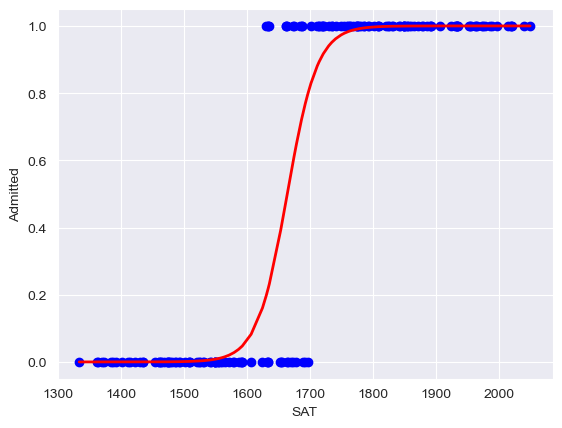

In [39]:
plt.scatter(x1,y,color='blue')
plt.plot(x_sorted,f_sort,lw=2,color='red')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [1]:
#practrice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
data